In [22]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from anchor import anchor_tabular

In [23]:
dataset = ""#sklearn"

In [24]:
if "sklearn" in dataset:
    target_class = ['Malignant', 'Benign']
    breast_cancer = load_breast_cancer()
    df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
    df["Class"] = breast_cancer.target
    y = df["Class"]
    X = df.drop("Class", axis=1)
    original_df = X.copy()
else:
    target_class = ['no-recurrence-events', 'recurrence-events']
    df = pd.read_csv('breast_cancer.csv', delimiter=',' , header=0,encoding='latin-1').dropna()
    X = df.loc[:, df.columns != "Class"]
    original_df = X.copy()
    y = df.loc[:, df.columns == "Class"]
    y = binary_labels = y.map(lambda x: 1 if x == 'recurrence-events' else 0)

In [25]:
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [26]:
if 'learn' not in dataset:
    # Encode categorical variables
    encod_column = {'Class': ['no-recurrence-events', 'recurrence-events'], 'age': ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'],
    'menopause': ['lt40', 'ge40', 'premeno'], 'tumor-size': ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54'],
    'inv-nodes': ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '21-23', '24-26'], 'node-caps': ['yes', 'no'], 
    'deg-malig': ['1', '2', '3'], 'breast': ['left', 'right'], 'breast-quad': ['left_up', 'left_low', 'right_up', 'right_low', 'central'], 
    'irradiat': ['yes', 'no'], 'Class': ['no-recurrence-events', 'recurrence-events']}
    encoder_by_column = {}
    for column in df.columns:
        le = LabelEncoder()
        le.fit(np.array(df[column].values))
        le.classes_ = np.array(encod_column[column])
        encoder_by_column[column] = le
        df[column] = le.transform(df[column].to_list())
    #df = df.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)
# Perform Standard Scaling on encoded data for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

## PCA Plot Generation

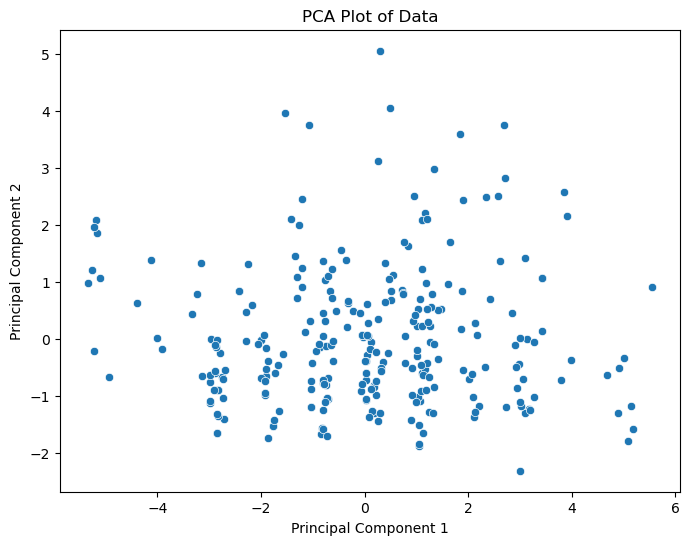

In [27]:
# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)

components = pca.fit_transform(df)

# Create a DataFrame with the reduced dimensions
components_df = pd.DataFrame(data=components, columns=['Component 1', 'Component 2'])

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Component 1', y='Component 2', data=components_df)
plt.title('PCA Plot of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Confusion Matrix

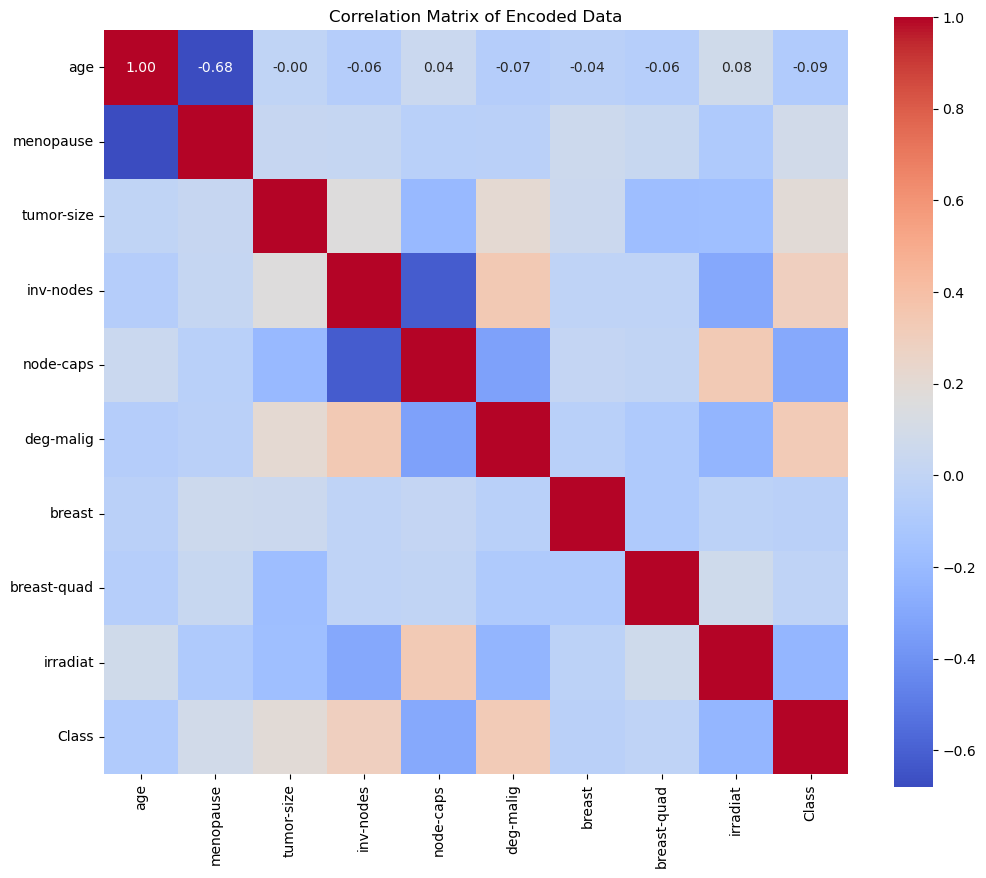

In [28]:
# Plotting the correlation matrix of the original encoded data
corr_matrix = pd.DataFrame(scaled_data, columns=df.columns).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Encoded Data')
plt.show()

# Ask LLMs

Hey, I am gonna need your help to generate explanation on the analysis of input data. To do that, I'll give you information about a dataset of cancer of radiotherapy along with kmeans clusters centers. Could you convert this information into a text that could be understandable by a layperson? 

### Sklearn Dataset

This dataset includes 569 instances (212 - Malignant, 357 - Benign). The instances are described by 30 numeric, predictive attributes and the class. 
* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension (“coastline approximation” - 1)

The mean, standard error, and “worst” or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features. For instance, field 0 is Mean Radius, field 10 is Radius SE, field 20 is Worst Radius.


### Other Dataset

This dataset includes 201 instances of one class and 85 instances of another class. The instances are described by 9 attributes, some of which are linear and some are nominal.
* Class: no-recurrence-events, recurrence-events
* age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
* menopause: lt40, ge40, premeno.
* tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
* inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
* node-caps: yes, no.
* deg-malig: 1, 2, 3.
* breast: left, right.
* breast-quad: left-up, left-low, right-up, right-low, central.

### Feature Correlation 

Can we expect some correlation between features of this datasets? If yes, which?

## K-Means Clustering

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


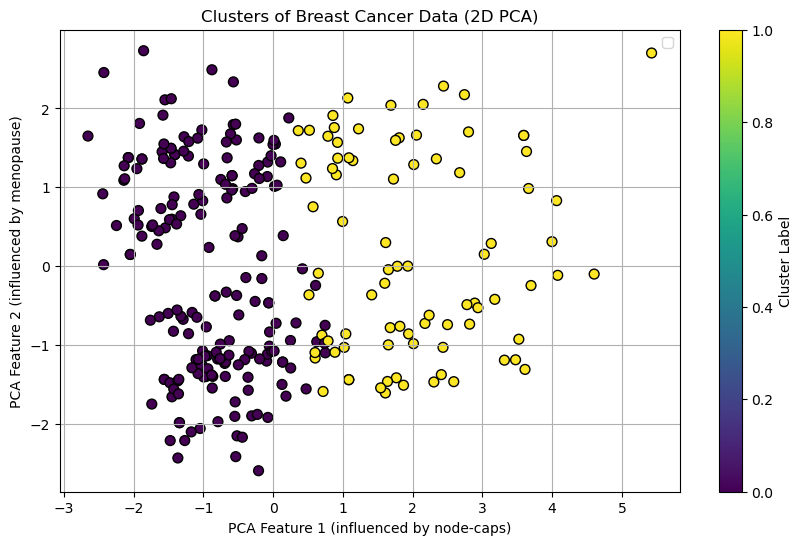

In [29]:
# Perform K-means clustering
n_clusters = 2  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")
kmeans = kmeans.fit(scaled_data)
cluster_labels = kmeans.predict(scaled_data)

# Train knn on the original data to prepare asking LLM 
encoder = OneHotEncoder()
encoder.fit(original_df.values)
original_kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")
original_kmeans = original_kmeans.fit(encoder.transform(original_df.values))#, y_train)

# Perform PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
components = pca.components_

# Identify the most significant features for each principal component
feature_indices = np.argsort(np.abs(components), axis=1)[:, -1]
most_significant_features = [df.columns[indices] for indices in feature_indices]

#fig, ax = plt.subplots(figsize=(10, 6))
#sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=cluster_labels, legend='full', ax=ax)

# Plotting the clusters with named PCA features
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', 
            marker='o', edgecolor='k', s=50)
plt.title('Clusters of Breast Cancer Data (2D PCA)')
plt.xlabel(f'PCA Feature 1 (influenced by {most_significant_features[0]})')
plt.ylabel(f'PCA Feature 2 (influenced by {most_significant_features[1]})')
plt.grid(True)
plt.legend()
plt.colorbar(label='Cluster Label')
plt.show()

## Hierarchical Clustering

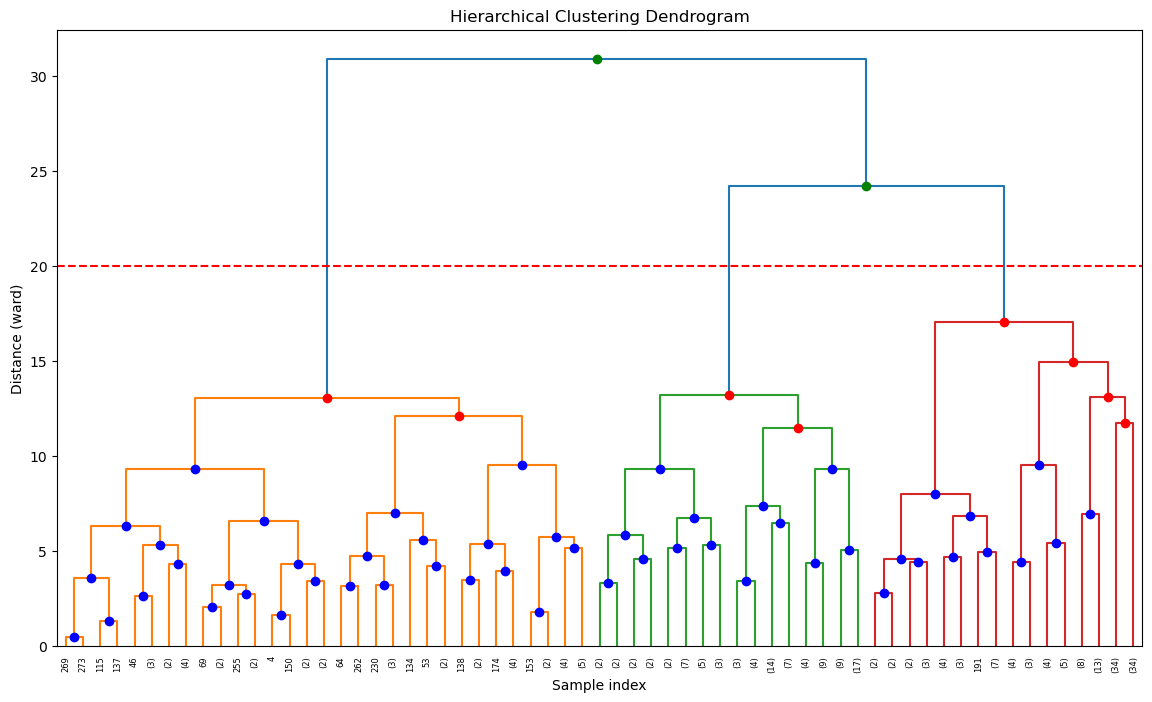

In [30]:
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(scaled_data)

Z = linkage(scaled_data, 'ward')

def color_threshold(den, t):
    for i, d in enumerate(den['icoord']):
        x = 0.5 * sum(d[1:3])
        y = den['dcoord'][i][1]
        if y > t:
            plt.plot(x, y, 'go')
        elif y > t / 2:
            plt.plot(x, y, 'ro')
        else:
            plt.plot(x, y, 'bo')


threshold = 26 if 'learn' in dataset else 20 # adjust this based on your dataset

# Plot the dendrogram
plt.figure(figsize=(14, 8))
dendro = dendrogram(Z, color_threshold=threshold, truncate_mode='level', p=5)

# Apply the custom color function
color_threshold(dendro, threshold)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance (ward)')
plt.axhline(y=threshold, color='r', linestyle='--')

# Add annotations or adjust the aesthetics as needed
plt.show()

# Ask LLM
### Clustering Techniques

In [31]:
for i, cluster in enumerate(original_kmeans.cluster_centers_):
    print(i, "cluster center:", encoder.inverse_transform(cluster.reshape(1, -1)))
    print('Prediction:', target_class[original_kmeans.predict(cluster.reshape(1, -1))[0]])
    print()

0 cluster center: [['40-49' 'premeno' '25-29' '0-2' 'no' 2 'left' 'left_low' 'no']]
Prediction: no-recurrence-events

1 cluster center: [['50-59' 'premeno' '30-34' '3-5' 'yes' 3 'right' 'left_low' 'yes']]
Prediction: recurrence-events



* Here's the first cluster center: [['40-49' 'premeno' '25-29' '0-2' 'no' 2 'left' 'left_low' 'no']]

Prediction: no-recurrence-events


* The second cluster center: [['50-59' 'premeno' '30-34' '3-5' 'yes' 3 'right' 'left_low' 'yes']]

Prediction: recurrence-events

### Hierarchical Clustering

In [11]:
# Retrieves the Euclidean distances between all the samples
distances = pairwise_distances(scaled_data, metric="euclidean", n_jobs=-1)

# Determines the sample indices assigned to each cluster
indices_par_cluster = []
past_clusters = set()
for label in cluster_labels:
    if label not in past_clusters:
        indices_par_cluster.append([])
        past_clusters.add(label)
    indices_par_cluster[-1].append(np.where(cluster_labels == label)[0][0])

stats_descr = {}
for idx, cluster_idx in enumerate(indices_par_cluster):
    stats_descr[f"Cluster {idx}"] = {}
    
    for i, current_col in enumerate(scaled_data.T):
        col = df.columns[i]
        mean = np.mean(current_col[cluster_idx])
        median = np.median(current_col[cluster_idx])
        stddev = np.std(current_col[cluster_idx])
        minval = np.min(current_col[cluster_idx])
        maxval = np.max(current_col[cluster_idx])
        
        stats_descr[f"Cluster {idx}"][col + "_mean"] = mean
        stats_descr[f"Cluster {idx}"][col + "_median"] = median
        stats_descr[f"Cluster {idx}"][col + "_stddev"] = stddev
        stats_descr[f"Cluster {idx}"][col + "_min"] = minval
        stats_descr[f"Cluster {idx}"][col + "_max"] = maxval

df_stats_descr = pd.DataFrame.from_dict(stats_descr)
print(df_stats_descr)

                    Cluster 0  Cluster 1     Cluster 2
age_mean            -0.637310   0.354459  1.561050e-01
age_median          -0.637310   0.354459  3.544587e-01
age_stddev           0.000000   0.000000  3.967073e-01
age_min             -0.637310   0.354459 -6.373096e-01
age_max             -0.637310   0.354459  3.544587e-01
menopause_mean       0.898280  -0.972573 -5.984028e-01
menopause_median     0.898280  -0.972573 -9.725734e-01
menopause_stddev     0.000000   0.000000  7.483412e-01
menopause_min        0.898280  -0.972573 -9.725734e-01
menopause_max        0.898280  -0.972573  8.982796e-01
tumor-size_mean     -0.883617  -0.883617 -2.549492e-01
tumor-size_median   -0.883617  -0.883617 -8.836171e-01
tumor-size_stddev    0.000000   0.000000  8.866514e-01
tumor-size_min      -0.883617  -0.883617 -8.836171e-01
tumor-size_max      -0.883617  -0.883617  9.955532e-01
inv-nodes_mean      -0.441865  -0.441865 -4.418647e-01
inv-nodes_median    -0.441865  -0.441865 -4.418647e-01
inv-nodes_

I then used a hierarchical clustering to try to identify some interesting information on each clusters about each feature distribution. Can you help me understand the results I obtained:

## Analyse Feature Distribution 

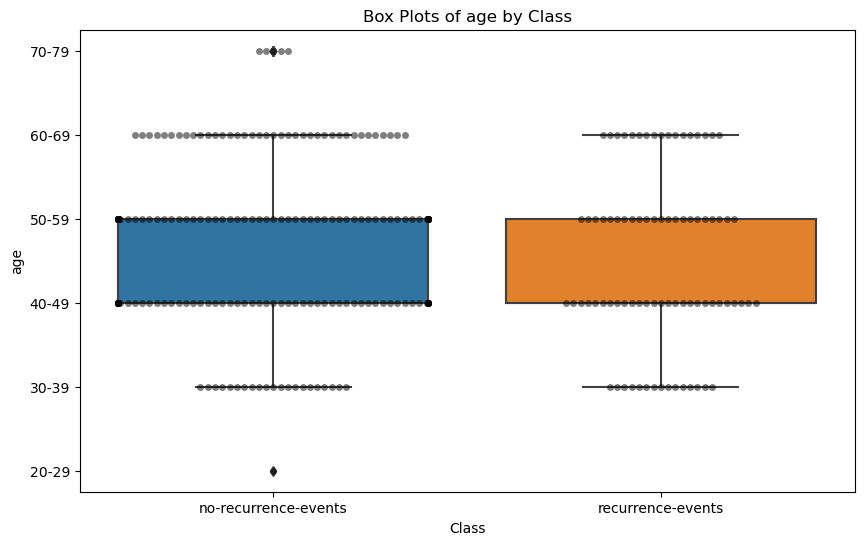

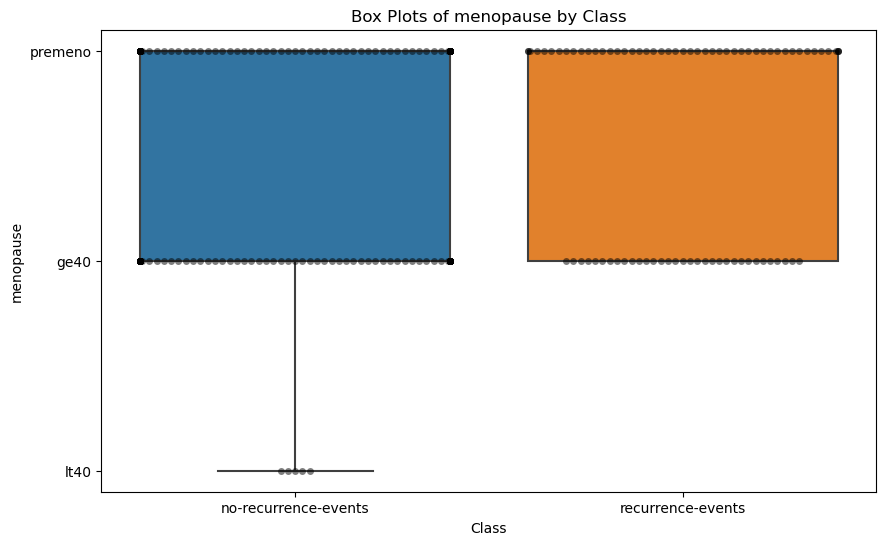

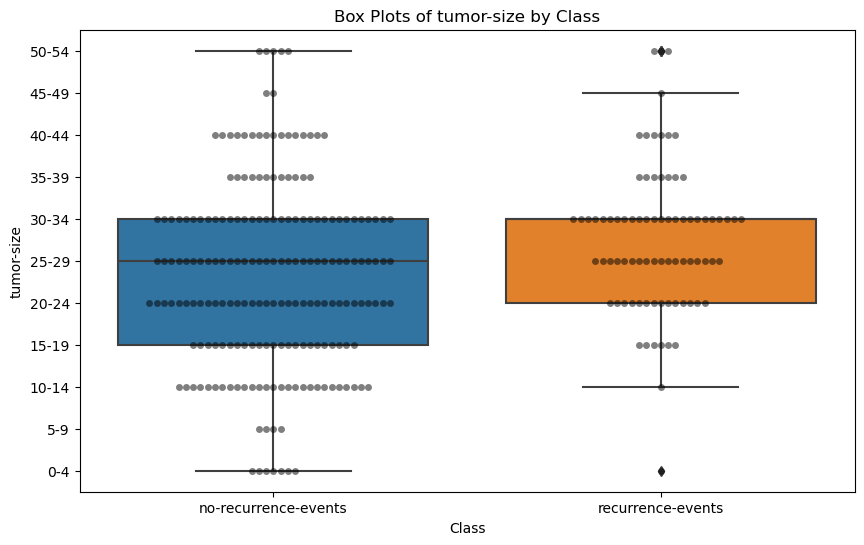

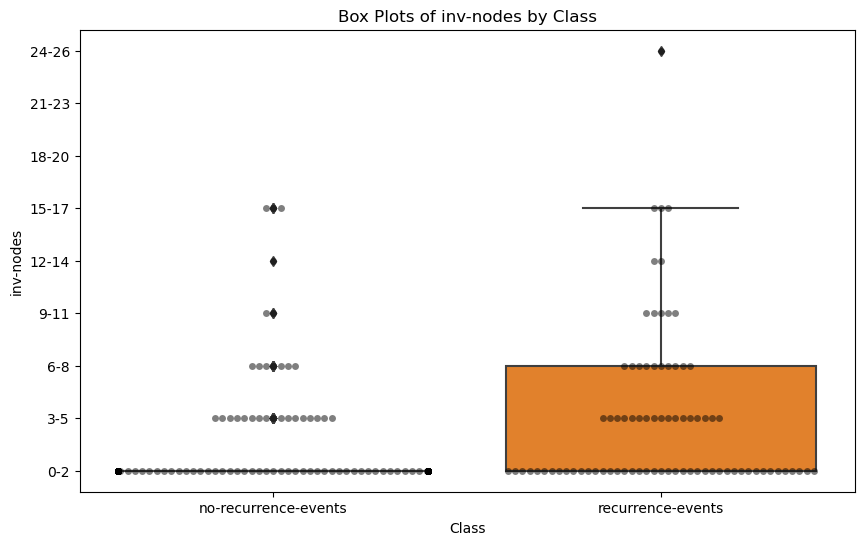

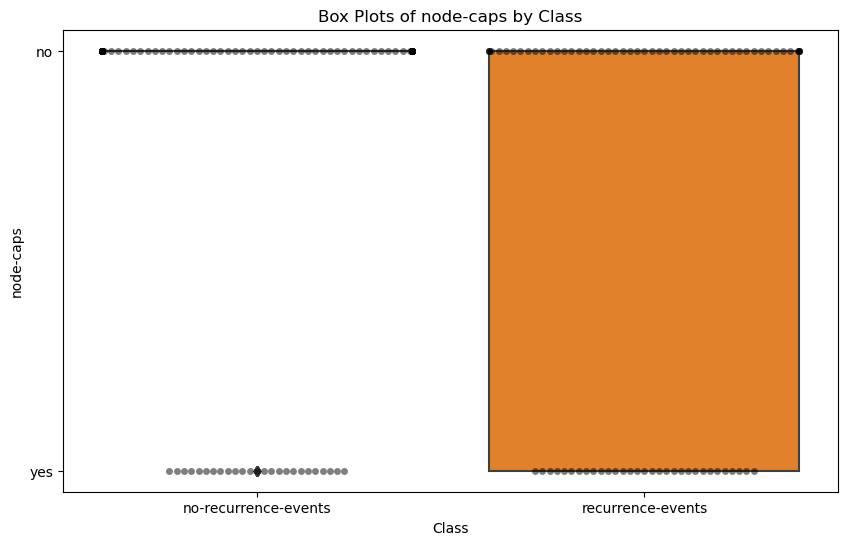

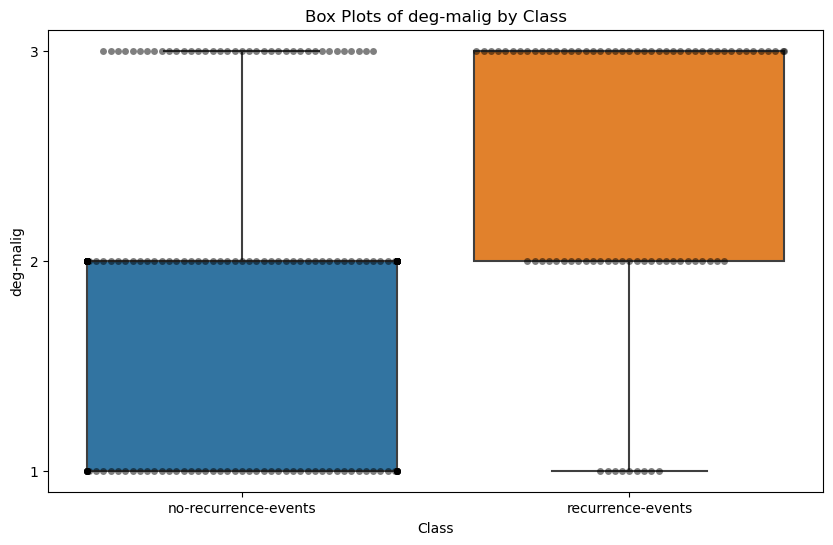

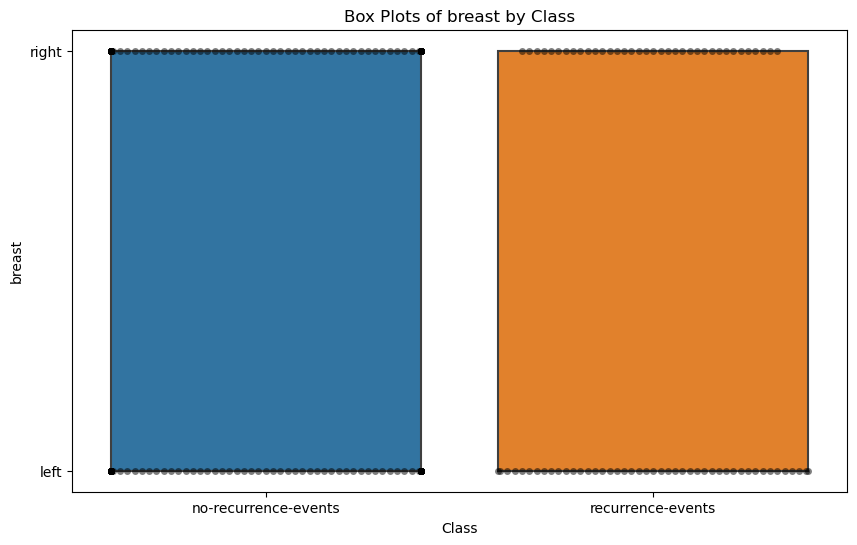

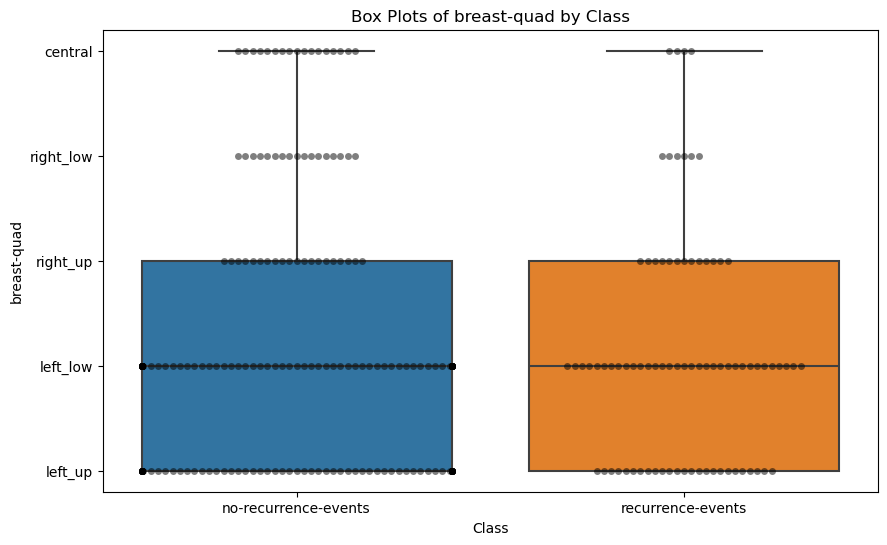

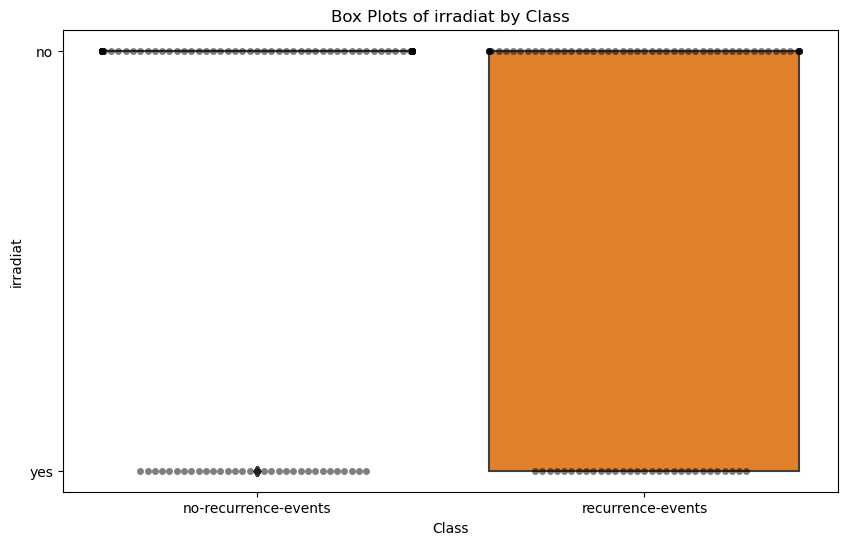

In [12]:
original_df['Class'] = df['Class']
for y_label in df.columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Class', y=y_label, data=df)
    sns.swarmplot(x='Class', y=y_label, data=df, color="black", alpha=0.5)

    plt.title(f'Box Plots of {y_label} by Class')
    plt.xlabel('Class')
    plt.ylabel(y_label)
    plt.xticks(np.arange(len(target_class)), target_class)
    if "learn" not in dataset:
        plt.yticks(np.arange(len(encod_column[y_label])), encod_column[y_label])
    plt.show()

# Anomaly Detection

In [13]:
# Plot anomly 
def plot_anomaly(outliers, method_name):
    colors=['green','red'] 

    for i in range(components_df.shape[0]): 
        if i not in outliers: 
            plt.scatter(components_df.iloc[i,0], components_df.iloc[i,1], color=colors[0]) # Not anomaly 
    for i in outliers: 
        plt.scatter(components_df.iloc[i,0], components_df.iloc[i,1], color=colors[1]) # anomaly 
    plt.xlabel('Principal Component 1',fontsize=13) 
    plt.ylabel('Principal Component 2',fontsize=13)         
    plt.title('Anomaly by ' + method_name,fontsize=16)         
    plt.show() 

## Isolation Forest

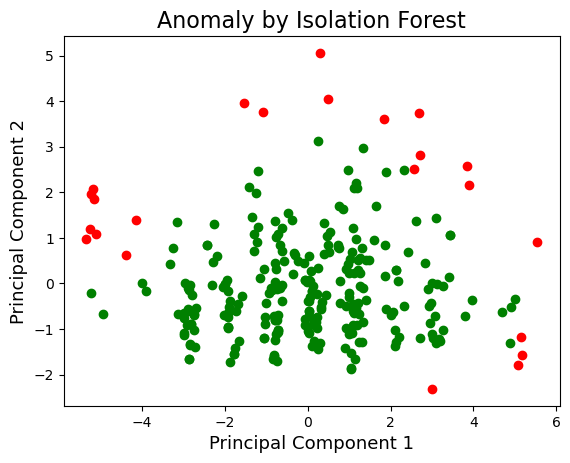

In [14]:
model = IsolationForest(contamination=0.08, max_features=0.8, max_samples=0.8, n_estimators=2000, random_state=42) 
#model.fit(scaled_data) 
model.fit(components_df)
  
# Calculate the outlier scores for each point 
#if_scores = model.decision_function(scaled_data) 
if_scores = model.decision_function(components_df) 
  
# Identify the points with the highest outlier scores 
if_outliers = np.where(if_scores < 0)[0].tolist() #np.argwhere(ir_scores < np.percentile(ir_scores, 17))
plot_anomaly(if_outliers, 'Isolation Forest')

## One-class Support Vector Machines (SVMs)

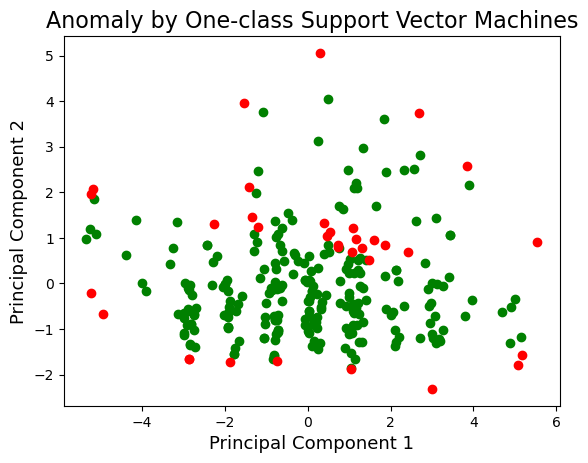

In [15]:
model = OneClassSVM(nu=0.05) 
#model.fit(scaled_data) 
model.fit(components_df)

# Calculate the outlier scores for each point 
#svm_scores = model.decision_function(scaled_data) 
svm_scores = model.decision_function(components_df) 
  
# Identify the points with the highest outlier scores 
svm_outliers = np.argwhere(svm_scores < np.percentile(svm_scores, 12)) 
plot_anomaly(svm_outliers, "One-class Support Vector Machines")

In [16]:
original_df = original_df.drop("Class", axis=1)
common_outliers = np.intersect1d(svm_outliers, if_outliers)
for i, common_outlier in enumerate(common_outliers):
    print("common anomaly", i)
    print(original_df.iloc[common_outlier].values.reshape(1, -1))
    print()

common anomaly 0
[['40-49' 'ge40' '40-44' '15-17' 'yes' 2 'right' 'left_up' 'yes']]

common anomaly 1
[['30-39' 'premeno' '0-4' '0-2' 'no' 2 'right' 'central' 'no']]

common anomaly 2
[['50-59' 'premeno' '50-54' '9-11' 'yes' 2 'right' 'left_up' 'no']]

common anomaly 3
[['30-39' 'premeno' '0-4' '0-2' 'no' 2 'right' 'central' 'no']]

common anomaly 4
[['60-69' 'ge40' '50-54' '0-2' 'no' 3 'right' 'left_up' 'no']]

common anomaly 5
[['60-69' 'ge40' '20-24' '24-26' 'yes' 3 'left' 'left_low' 'yes']]

common anomaly 6
[['60-69' 'ge40' '50-54' '0-2' 'no' 2 'right' 'left_up' 'yes']]

common anomaly 7
[['40-49' 'premeno' '15-19' '12-14' 'no' 3 'right' 'right_low' 'yes']]

common anomaly 8
[['70-79' 'ge40' '40-44' '0-2' 'no' 1 'right' 'left_up' 'no']]

common anomaly 9
[['50-59' 'premeno' '35-39' '15-17' 'yes' 3 'right' 'right_up' 'no']]



# Ask LLM
Okay, I feel like there may be some anomalies or outliers in this dataset. Therefore I used 2 techniques to detect them. Can you explain or give me some insights on why these instances are detected as anomalies by my two anomaly detection techniques: 

# Classification Techniques

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

def train_model(model, train, labels):
    encoder = OneHotEncoder(handle_unknown='ignore')
    encoder.fit(train.values)

    model = model.fit(encoder.transform(train.values), labels)
    predict_fn = lambda x: model.predict(encoder.transform(x))
    return predict_fn

predict_fn = train_model(RandomForestClassifier(random_state=42), X_train, y_train)
print(predict_fn(X_test.values[10:20]))

[0 0 1 1 1 1 0 0 1 0]


In [18]:
# Initialize an anchor explainer technique that use decision rules to explain specific decision taken by a classifier

np.random.seed(1)
def generate_explanations(train, test, predict_fn, target_text):
    class_names = ["no-recurrence-events", "recurrence-events"]
    if "sklearn" in dataset:
        categorical_features = []
    else:
        categorical_features = list(range(0, test.shape[1]))
    categorical_names = {}
    temp_data = test.to_numpy()
    for feature in categorical_features:
        le = LabelEncoder()
        le.fit(temp_data[:, feature])
        temp_data[:, feature] = le.transform(temp_data[:, feature])
        categorical_names[feature] = le.classes_

    explainer = anchor_tabular.AnchorTabularExplainer(
        class_names,
        train.columns,
        train.to_numpy(),
        categorical_names
        )
    exp = explainer.explain_instance(target_text, predict_fn, threshold=0.95)
    print('Prediction: ', explainer.class_names[predict_fn(target_text.reshape(1, -1))[0]])
    print('Anchor: %s' % (' AND '.join(exp.names())))

In [19]:
instances_idx = 0
generate_explanations(X_train, X_test, predict_fn, X_test.to_numpy()[instances_idx])

Prediction:  no-recurrence-events
Anchor: menopause = ge40 AND inv-nodes = 0-2 AND irradiat = no AND tumor-size = 25-29


In [20]:
for i, common_outlier in enumerate(common_outliers):
    print("anomaly", i)
    print(original_df.iloc[common_outlier].values.reshape(1, -1))
    generate_explanations(X_train, X_test, predict_fn, original_df.iloc[common_outlier].values.reshape(1, -1))
    print()

anomaly 0
[['40-49' 'ge40' '40-44' '15-17' 'yes' 2 'right' 'left_up' 'yes']]
Prediction:  no-recurrence-events
Anchor: tumor-size = 40-44 AND breast-quad = left_up AND menopause = ge40 AND breast = right

anomaly 1
[['30-39' 'premeno' '0-4' '0-2' 'no' 2 'right' 'central' 'no']]
Prediction:  no-recurrence-events
Anchor: tumor-size = 0-4 AND inv-nodes = 0-2

anomaly 2
[['50-59' 'premeno' '50-54' '9-11' 'yes' 2 'right' 'left_up' 'no']]
Prediction:  recurrence-events
Anchor: node-caps = yes AND inv-nodes = 9-11 AND tumor-size = 50-54 AND breast-quad = left_up

anomaly 3
[['30-39' 'premeno' '0-4' '0-2' 'no' 2 'right' 'central' 'no']]
Prediction:  no-recurrence-events
Anchor: tumor-size = 0-4 AND inv-nodes = 0-2

anomaly 4
[['60-69' 'ge40' '50-54' '0-2' 'no' 3 'right' 'left_up' 'no']]
Prediction:  no-recurrence-events
Anchor: tumor-size = 50-54 AND inv-nodes = 0-2

anomaly 5
[['60-69' 'ge40' '20-24' '24-26' 'yes' 3 'left' 'left_low' 'yes']]
Prediction:  recurrence-events
Anchor: node-caps = 

In [21]:
instances_generated = [['30-39', 'lt40', '0-2', '0-2', 'no', 1, 'left', 'left_low', 'yes'], ['40-49', 'ge40', '35-39', '15-17', 'yes', 2, 'right', 'right_up', 'no'],
                       ['50-59', 'premeno', '20-24', '0-2', 'no', 3, 'left', 'left_low', 'no'], ['60-69', 'ge40', '45-49', '18-20', 'yes', 3, 'right', 'right_low', 'yes'],
                        ['30-39', 'lt40', '45-49', '15-17', 'yes', 3, 'left', 'central', 'yes']]
for i, instance_generated in enumerate(instances_generated):
    print("instance generated", i)
    print(instance_generated)
    generate_explanations(X_train, X_test, predict_fn, np.array(instance_generated).reshape(1, -1))
    print()

instance generated 0
['30-39', 'lt40', '0-2', '0-2', 'no', 1, 'left', 'left_low', 'yes']
Prediction:  no-recurrence-events
Anchor: tumor-size = 0-2 AND inv-nodes = 0-2

instance generated 1
['40-49', 'ge40', '35-39', '15-17', 'yes', 2, 'right', 'right_up', 'no']
Prediction:  no-recurrence-events
Anchor: tumor-size = 35-39 AND breast = right AND irradiat = no AND deg-malig = 2

instance generated 2
['50-59', 'premeno', '20-24', '0-2', 'no', 3, 'left', 'left_low', 'no']
Prediction:  no-recurrence-events
Anchor: node-caps = no AND inv-nodes = 0-2 AND deg-malig = 3 AND tumor-size = 20-24

instance generated 3
['60-69', 'ge40', '45-49', '18-20', 'yes', 3, 'right', 'right_low', 'yes']
Prediction:  recurrence-events
Anchor: node-caps = yes AND irradiat = yes AND age = 60-69 AND breast-quad = right_low

instance generated 4
['30-39', 'lt40', '45-49', '15-17', 'yes', 3, 'left', 'central', 'yes']
Prediction:  recurrence-events
Anchor: node-caps = yes AND age = 30-39 AND irradiat = yes AND breast

# Ask LLM
Okay, I have trained a random forest classifier and used the method Anchors to generate explanations on these particular anomalies. Can you explain or give me some insights on why these instances are detected as anomalies by my two anomaly detection techniques: 